In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [19]:
x,_=make_blobs(n_samples=100, 
               centers=1,
                 cluster_std=2,   ## cluster std is a parameter that controls the spread of the clusters # cluster std deviation
                 random_state=42)


In [20]:
def divisive_clustering(data,mmax_clusters=4):
    clusters=[data] # start wiht one big cluster
    label=np.zeros(len(data),dtype=int) # label of each point
    while len(clusters)<mmax_clusters:
        idx_to_split=np.argmax([len(c) for c in clusters]) # find the largest cluster
        # this is the cluster we wamt to splix tnext
        cluster_to_split=clusters.pop(idx_to_split)
        current_label=np.max(label)+1 # new label for the new clusters
        # get a new label to assign to the newly form cluster
        # use kmeans to split the cluster into two
        kmeans=KMeans(n_clusters=2,random_state=42)
        split_label= kmeans.fit_predict(cluster_to_split)
        cluster1=cluster_to_split[split_label==0]
        cluster2=cluster_to_split[split_label==1]
        clusters.append(cluster1)
        clusters.append(cluster2)
        # labell assignments 
        label_indices= np.where([np.any(np.all(x==cluster_to_split,axis=1))for x in data])[0]

        label_subset=split_label
        label[label_indices]=current_label
        label[label_indices[label_subset == 0]] = current_label 
        label[label_indices[split_label==1]]=current_label+1
    return label    


In [21]:
cluster_labels=divisive_clustering(x,
                                   mmax_clusters=4)

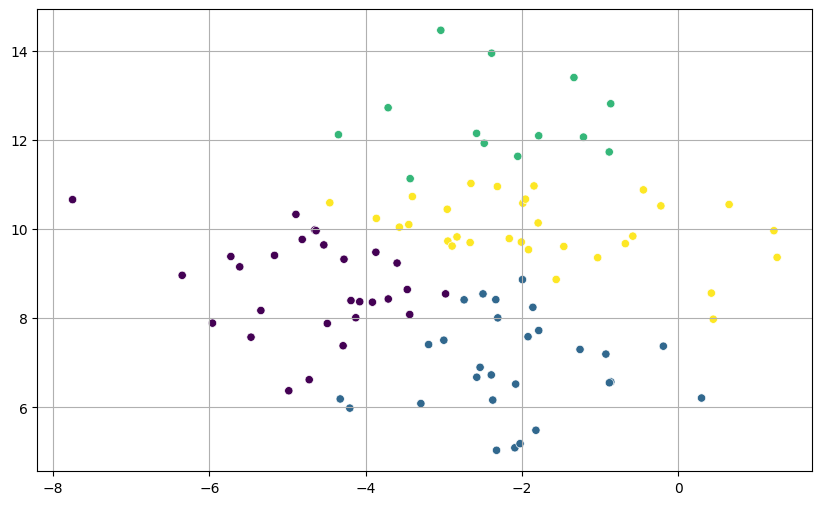

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x[:,0],y=x[:,1],c=cluster_labels)
plt.grid(True)
plt.show()